<a href="https://colab.research.google.com/github/Madhan-404/CryptoData-Analytics/blob/main/ETH_TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas_datareader import data
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


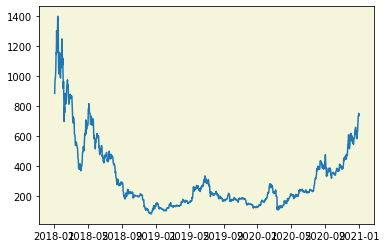

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Crypto Data/Ethereum.csv' ) 
#data=data.set_index('Date')
date='2018-01-1'
date1='2021-01-1'
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y' )
#data['year']= pd.DatetimeIndex(data['Date']).year
data=data[data['Date']>date]
data=data[data['Date']<date1]
data =data.set_index('Date')
del data['Open'], data['High'], data['Low'], data['Volume'],data['Market Cap']
data
#series1 = data.Close.dropna() #original series
series1 = data.copy() #original series
ax = plt.axes()
ax.set_facecolor('beige')
plt.rcParams["figure.figsize"] = [9.50, 3.50]
plt.rcParams.update({'font.size': 5})
plt.plot(series1)


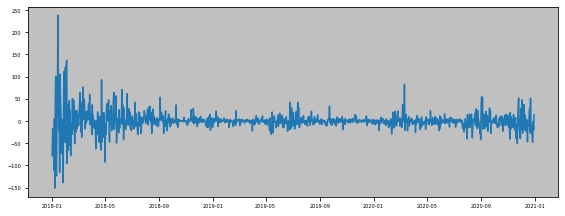

In [ ]:
ax = plt.axes()
series2 = data.Close.diff().dropna() #first order differenced series
ax.set_facecolor('silver')
plt.rcParams["figure.figsize"] = [9.50, 5.50]
plt.rcParams.update({'font.size': 10})
plt.plot(series2)

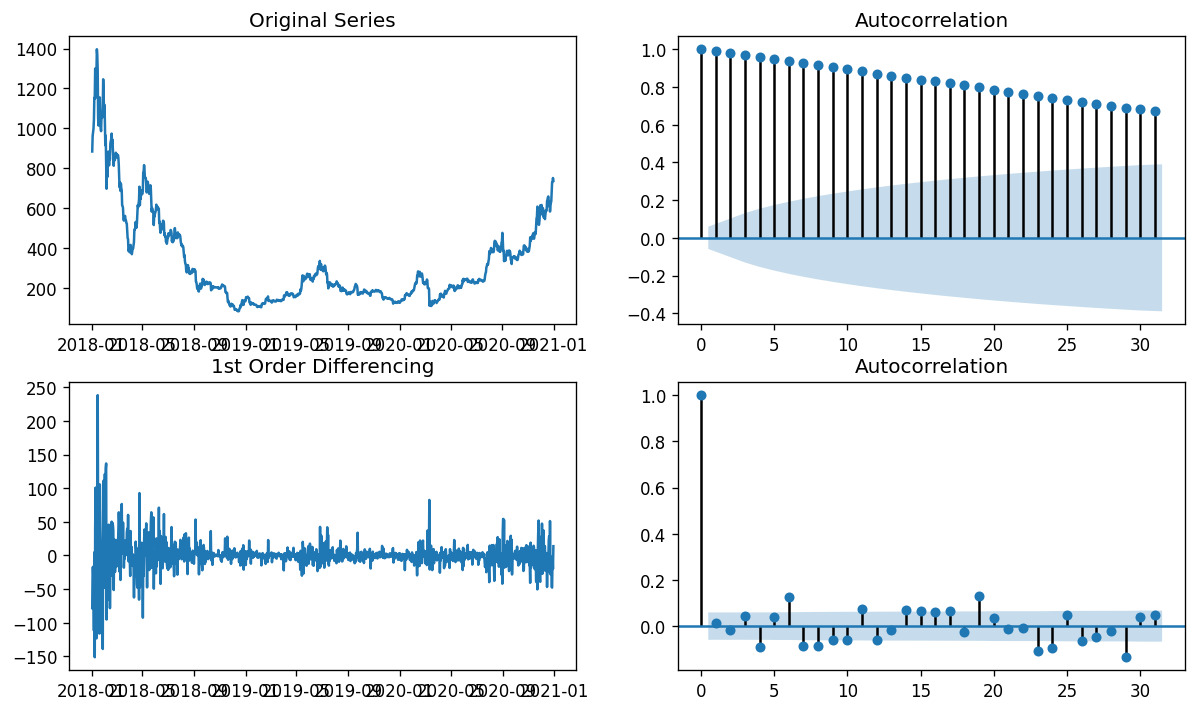

In [ ]:
plt.rcParams.update({'figure.figsize':(12,7), 'figure.dpi':120})
# Original Series
fig, axes = plt.subplots(2, 2)
axes[0, 0].plot(series1); 
axes[0, 0].set_title('Original Series')
plot_acf(series1, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(series2); 
axes[1, 0].set_title('1st Order Differencing')
plot_acf(series2, ax=axes[1, 1])
plt.rcParams["figure.figsize"] = [9.50, 3.50]
plt.rcParams.update({'font.size': 4})
plt.show()

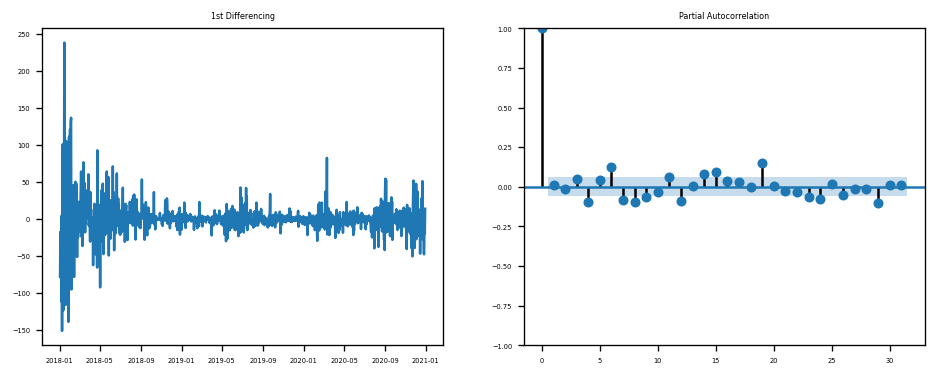

In [ ]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(series2); 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,1))
plot_pacf(series2, ax=axes[1])
plt.rcParams["figure.figsize"] = [11.50, 5.50]
plt.rcParams.update({'font.size': 4})
plt.show()

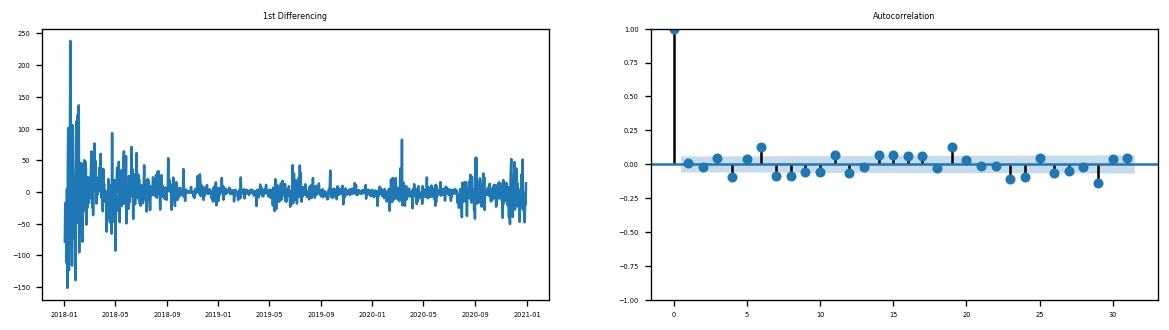

In [ ]:
#Find q in MA(q)
plt.rcParams.update({'figure.figsize':(12,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2)
axes[0].plot(series2); 
axes[0].set_title('1st Differencing')
axes[1].set(ylim=(-1,1))
plot_acf(series2, ax=axes[1])
plt.show()

In [ ]:
indices = series2.copy()
indices.head()

Date
2020-12-30    13.815574
2020-12-29   -20.098853
2020-12-28    -1.122754
2020-12-27   -47.755006
2020-12-26   -46.806528
Name: Close, dtype: float64

In [ ]:
 indices.describe()

count    1094.000000
mean        0.134041
std        22.969854
min      -151.209961
25%        -6.341090
50%        -0.087585
75%         4.469132
max       238.230103
Name: Close, dtype: float64

In [ ]:
dg =indices.copy()
size = int(len(dg)*0.8)

In [ ]:
dg_train = dg.iloc[:size]

In [ ]:
dg_test = dg.iloc[size:]

In [ ]:
dg_train.tail()

Date
2018-08-13     7.563
2018-08-12    33.075
2018-08-11     2.542
2018-08-10    12.064
2018-08-09    31.412
Name: Close, dtype: float64

In [ ]:
dg_test.head()

Date
2018-08-08    -8.975
2018-08-07    23.602
2018-08-06    26.443
2018-08-05     3.858
2018-08-04    -3.264
Name: Close, dtype: float64

In [ ]:
import statsmodels.tsa.stattools as sts

In [ ]:
#0,1,1 ARIMA Model
model = ARIMA(series1.dropna(), order= (3,1,3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1094
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -4977.462
Method:                       css-mle   S.D. of innovations             22.888
Date:                Tue, 17 May 2022   AIC                           9970.925
Time:                        03:41:02   BIC                          10010.906
Sample:                    12-30-2020   HQIC                          9986.054
                         - 01-02-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1420      0.534      0.266      0.790      -0.904       1.188
ar.L1.D.Close    -0.0405      0.737     -0.055      0.956      -1.485       1.404
ar.L2.D.Close     0.9164      0.075     

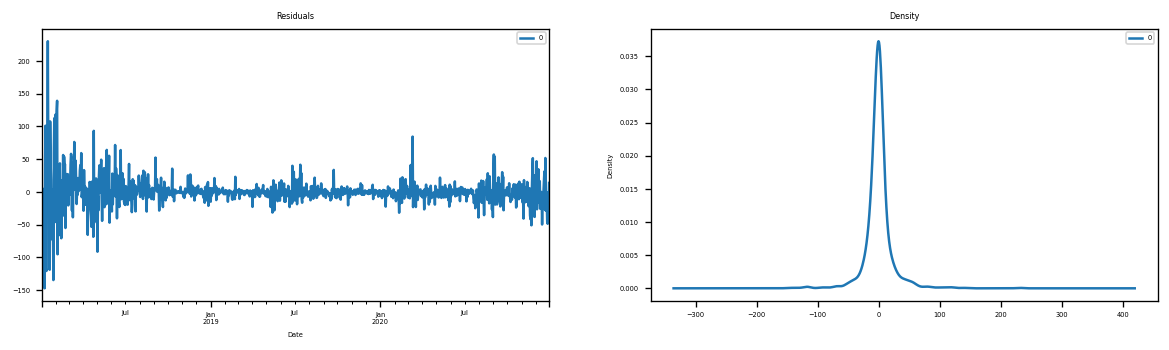

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

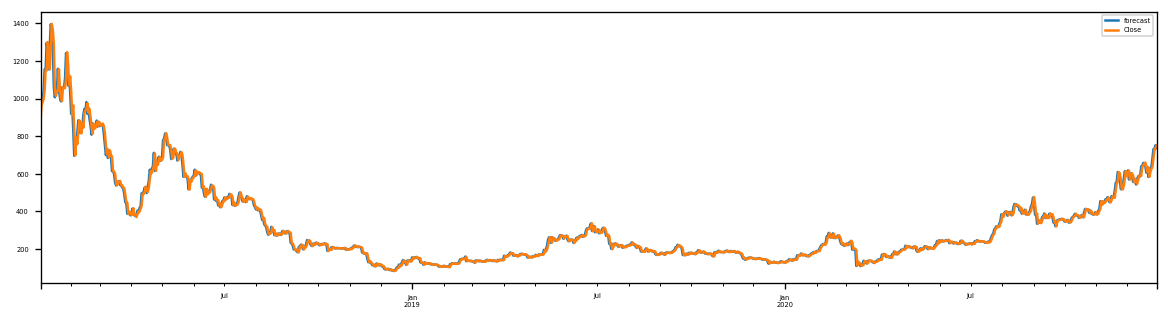

In [ ]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


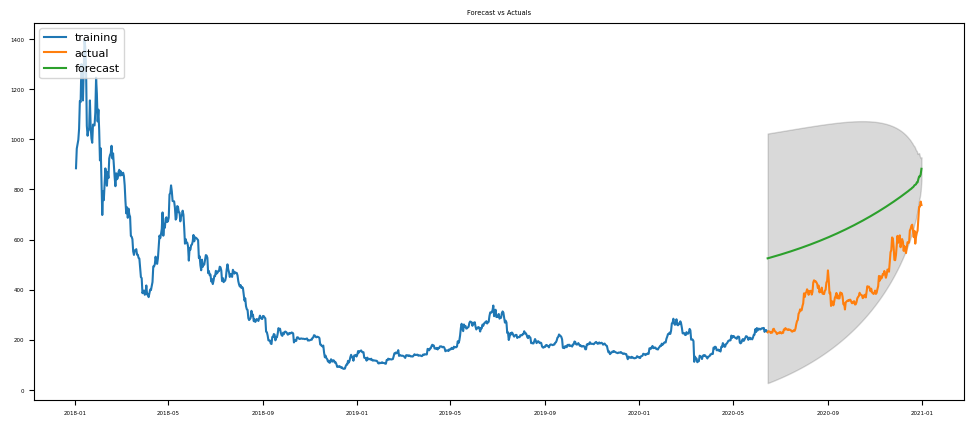

In [ ]:
# Create Training and Test
train = series1.dropna()[200:] #first 200 rows in the training set
test = series1.dropna()[:200] #remaining rows in the test set
#If it is not a time series, then this is not the ideal way for #train-test split. You may use scikit-learn library and use function #train_test_split() by providing the ratio. Since this is a time-#series data set, we cannot use future values to predict past #values.
# Build Model
# model = ARIMA(train, order=2,1,1))  
model = ARIMA(train, order=(7, 0, 1))  
fitted = model.fit(disp=-1)
# Forecast
fc, se, conf = fitted.forecast(200, alpha=0.05)  # 95% conf
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
from sklearn.metrics import r2_score
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
   # np. mean(np. abs((actual - pred) / actual)) * 100
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    R2 = (r2_score(actual, forecast))
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,'R2': R2 })
forecast_accuracy(fc, test.values)

{'R2': -6.696936814686334,
 'mae': 343.95223608766014,
 'mape': 1.0386399276126117,
 'me': 342.85548383106044,
 'mpe': 1.0371472047355343,
 'rmse': 371.9252195412851}